<a href="https://colab.research.google.com/github/Merlinvensiya/my-project/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/dataset new.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix ,classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data  = pd.read_csv("/content/dataset new.csv")
data_sevrity = pd.read_csv("/content/Symptom-severity.csv")

In [ ]:
for ind in data_sevrity.index:
    continue

In [ ]:
data_dict = data_sevrity.set_index('Symptom').T.to_dict()

<ipython-input-13-f78158111e90>:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  data_dict = data_sevrity.set_index('Symptom').T.to_dict()


In [ ]:
def remove_space_between_word(dataset):
    for col in dataset.columns:
        for i in range(len(dataset[col])):
            if (type(dataset[col][i]) == str ):
                dataset[col][i] = dataset[col][i].strip()
                dataset[col][i] = dataset[col][i].replace(" ", "_")
    return data

In [ ]:
new_df = remove_space_between_word(data)
new_df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal_infection,itching,skin_rash,nodal_skin_eruptions,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal_infection,skin_rash,nodal_skin_eruptions,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal_infection,itching,nodal_skin_eruptions,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal_infection,itching,skin_rash,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal_infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def enc(dataset):
    for ind in data_sevrity.index:
        dataset = dataset.replace(data_sevrity["Symptom"][ind] , data_sevrity["weight"][ind])
    dataset = dataset.fillna(0) # put empty cell to 0
    dataset = dataset.replace("foul_smell_of_urine" , 5)
    dataset = dataset.replace("dischromic__patches" , 6)
    dataset = dataset.replace("spotting__urination" , 6)
    return dataset

In [ ]:
ds=enc(data)

In [ ]:
def encode_data(dataset , data_dict_weigth):
    cols = dataset.columns
    for columnName in cols:
        for i in range(len(dataset[columnName])):
            try:
            #print(data_dict[data2[columnName][i]]["weight"])
                dataset[columnName][i] = data_dict[dataset[columnName][i]]["weight"]
            except:
                pass
    dataset = dataset.fillna(0) # put empty cell to 0
    dataset = dataset.replace("foul_smell_of_urine" , 5)
    dataset = dataset.replace("dischromic__patches" , 6)
    dataset = dataset.replace("spotting__urination" , 6)
    return dataset

In [ ]:
df = encode_data(new_df , data_dict)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal_infection,1,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal_infection,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal_infection,1,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal_infection,1,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal_infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
names = []
for col in df.columns:
    if(col != "Disease"):
        for i in range(len(df[col])):
            if (type(df[col][i]) == str ):
                if df[col][i] not in names :
                    names.append(df[col][i])

print(" no replace are :" , names)

 no replace are : []


In [ ]:
data_sevrity.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [ ]:
data_sevrity.shape

(133, 2)

Text(0.5, 0, 'name of disease')

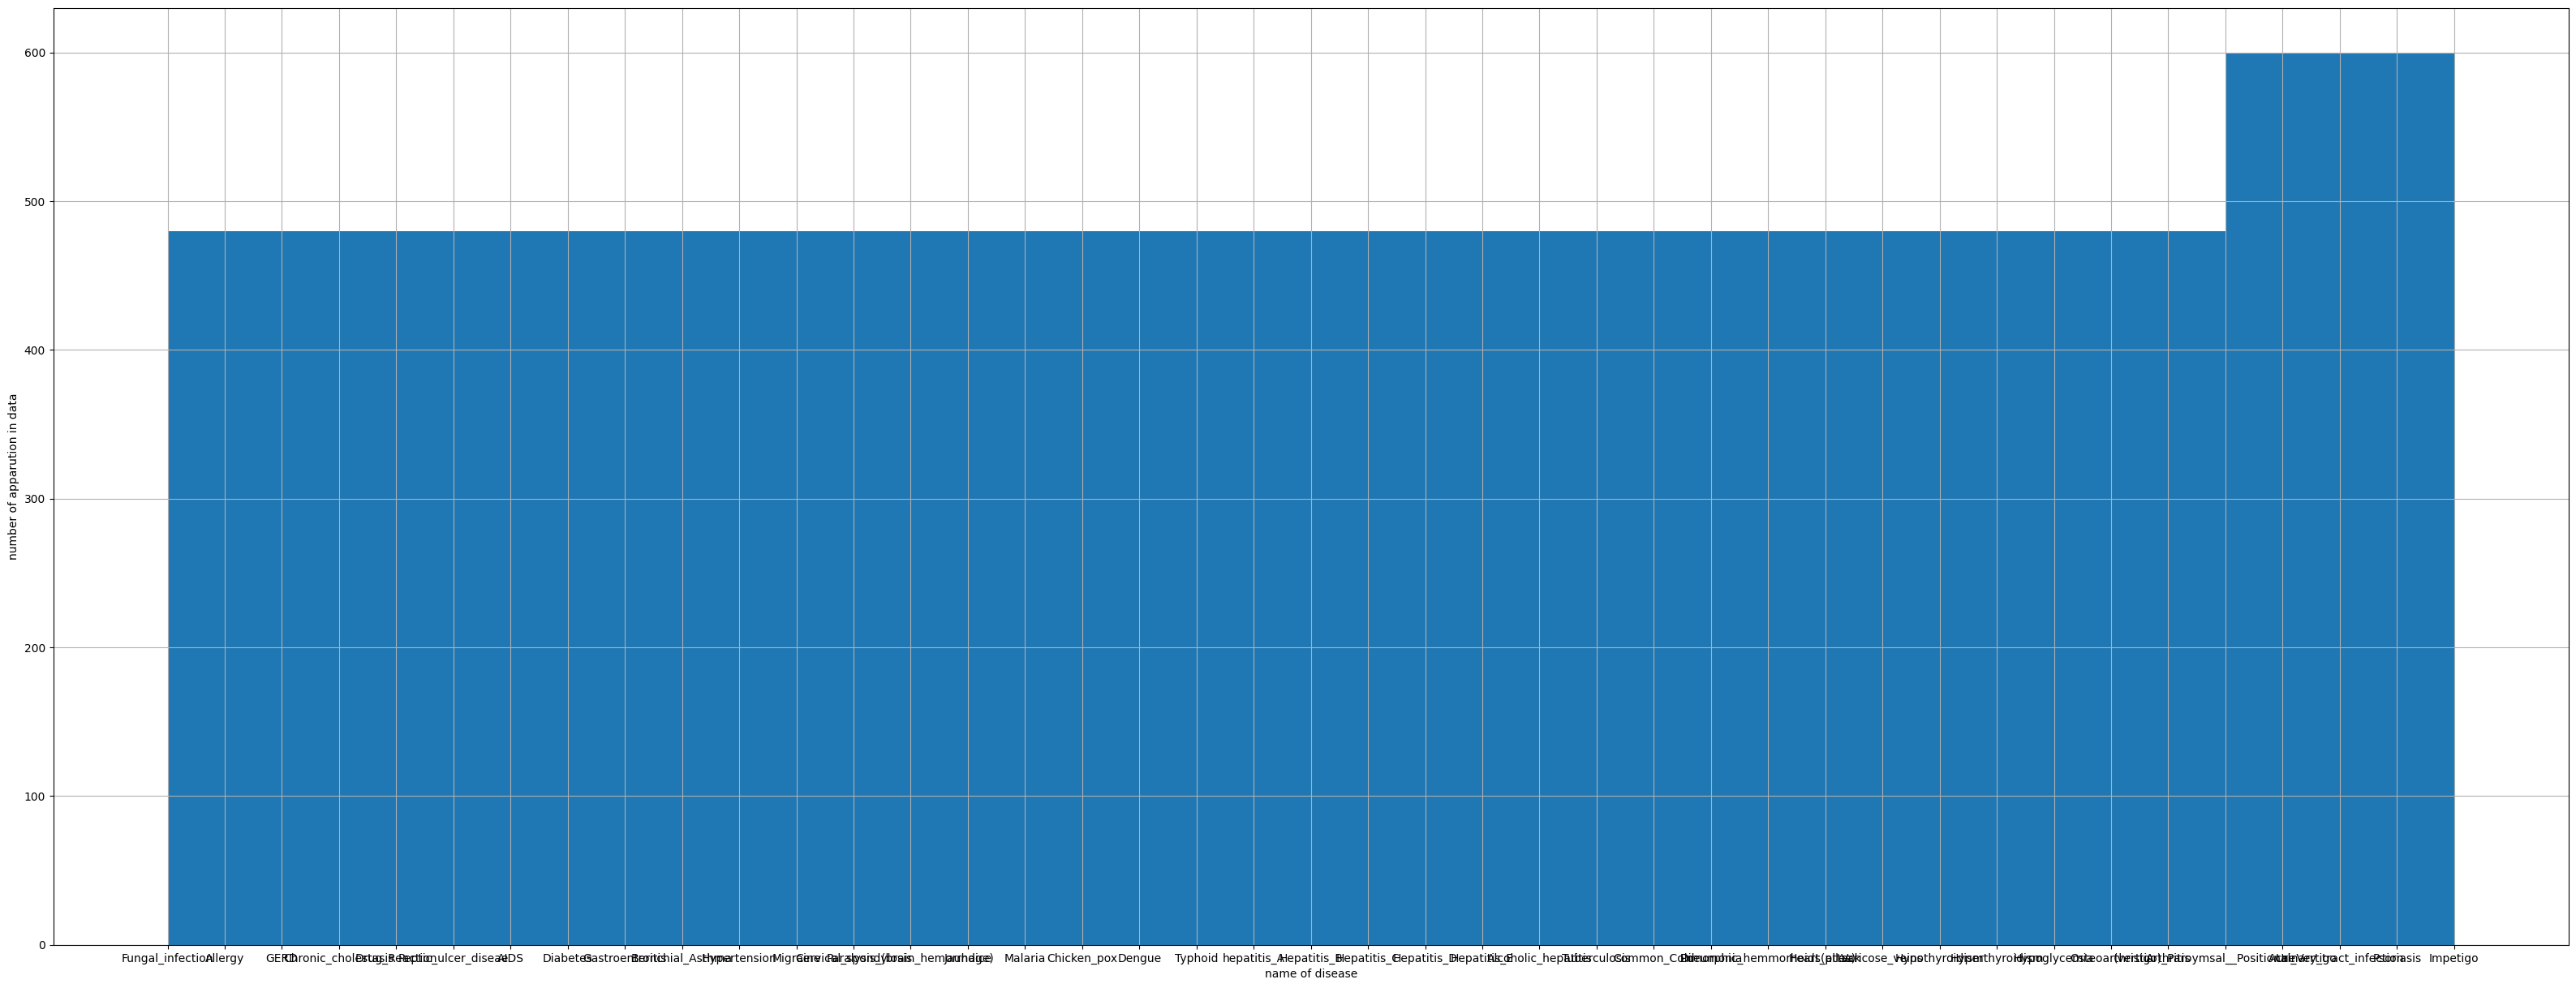

In [ ]:
fig = plt.figure(figsize=(40, 15))
ax = fig.gca()
data["Disease"].hist(ax =ax)
plt.ylabel("number of apparution in data")
plt.xlabel("name of disease")

array([[<Axes: title={'center': 'weight'}>]], dtype=object)

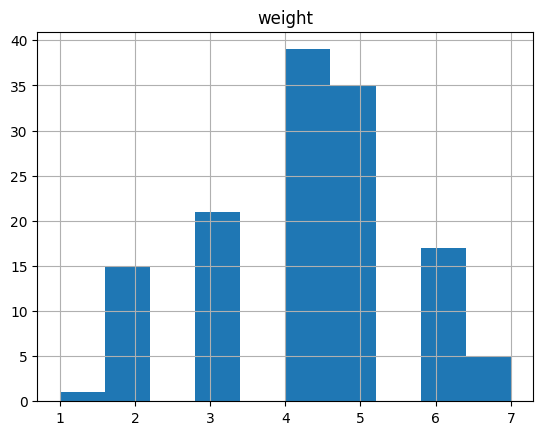

In [ ]:
data_sevrity.hist()

In [ ]:
len(data_sevrity["Symptom"].unique())

132

In [ ]:
data_dict = data_sevrity.set_index('Symptom').T.to_dict()

<ipython-input-27-f78158111e90>:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  data_dict = data_sevrity.set_index('Symptom').T.to_dict()


In [ ]:
df_data = df.drop('Disease' , axis =1)
label = data["Disease"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_data, label, shuffle=True, train_size = 0.70)
randomFC = RandomForestClassifier()
randomFC.fit(x_train, y_train)
result = randomFC.predict(x_test)
print(randomFC)
print(classification_report(y_true=y_test, y_pred=result))
print('F1-score% =', f1_score(y_test, result, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, result)*100)

RandomForestClassifier()
                                         precision    recall  f1-score   support

(vertigo)_Paroymsal__Positional_Vertigo       1.00      1.00      1.00        35
                                   AIDS       1.00      1.00      1.00        29
                                   Acne       1.00      1.00      1.00        40
                    Alcoholic_hepatitis       1.00      1.00      1.00        39
                                Allergy       0.93      1.00      0.97        43
                              Arthritis       1.00      1.00      1.00        39
                       Bronchial_Asthma       1.00      1.00      1.00        39
                   Cervical_spondylosis       1.00      0.92      0.96        39
                            Chicken_pox       1.00      1.00      1.00        36
                    Chronic_cholestasis       1.00      1.00      1.00        37
                            Common_Cold       1.00      1.00      1.00        40
  